# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

# Importing Modules and Loading Data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Inspecting the Data

### 4 numeric and 1 categorical data column

In [22]:
print(crops.head())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


### No missing values

In [23]:
print(crops.isna().sum().sort_values())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


### Features have different variances, so need to be scaled for an equal chance

In [24]:
print(crops.var())

N     1362.889537
P     1088.068460
K     2565.212869
ph       0.598980
dtype: float64


### Classes in the Dataset are also balanced

Text(0, 0.5, 'Number of Samples')

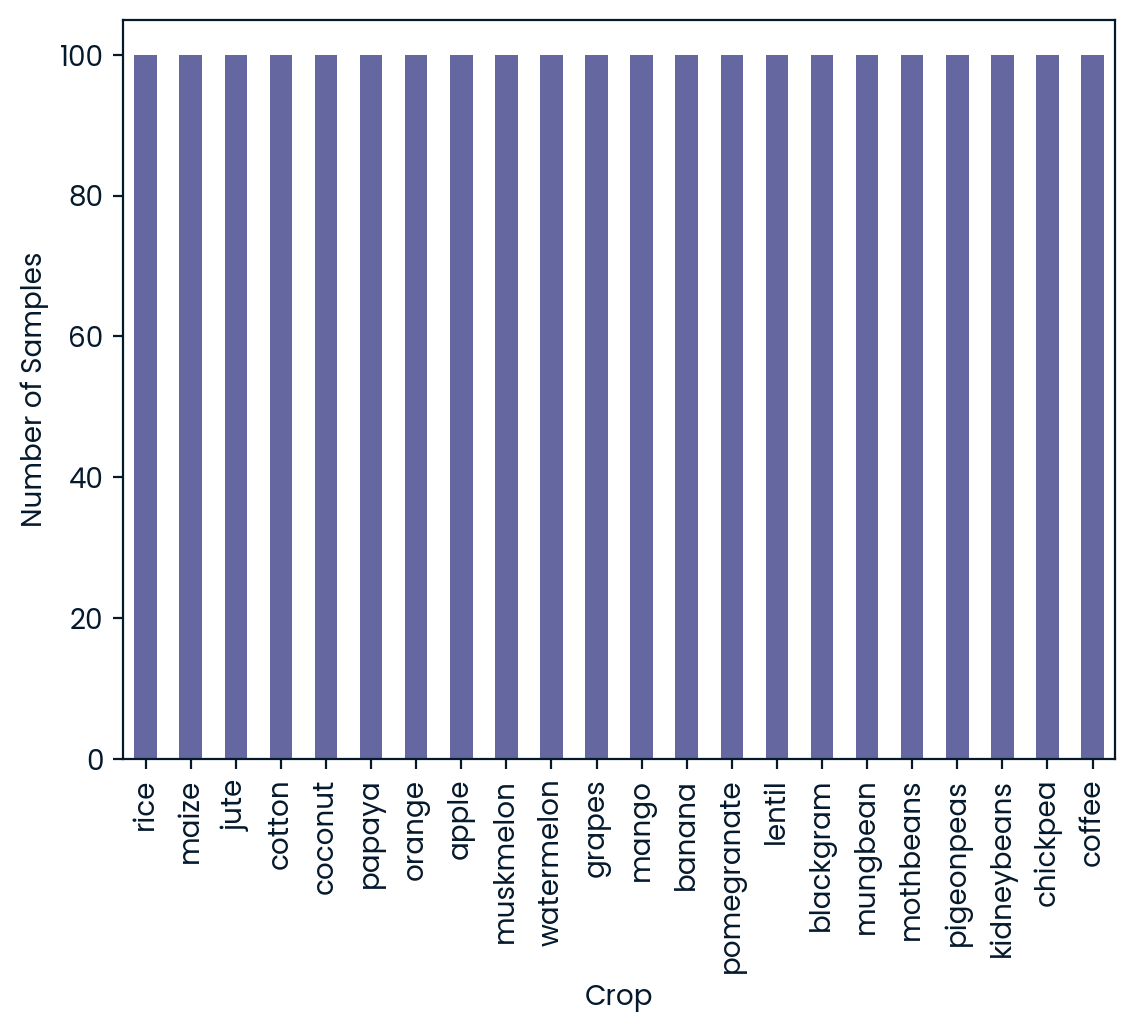

In [25]:
crop_counts = crops["crop"].value_counts()
crop_counts.plot(kind='bar')
plt.xlabel("Crop")
plt.ylabel("Number of Samples")

# Preparing Data

In [26]:
# Preparing features and target variable
crops_dummies = pd.get_dummies(crops["crop"])
X = crops.drop("crop", axis=1).values
y = np.argmax(crops_dummies.values, axis=1) # Convert 1 Hot encoding to integers

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

# Scaling the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiating the Models

In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear SVM": LinearSVC(),
}

# Determining Best Feature for Each Classifier

### Across all the models Potassium concentration seems to be the best single feature, with KNN giving the best median score and least variance in the cross validation scores.

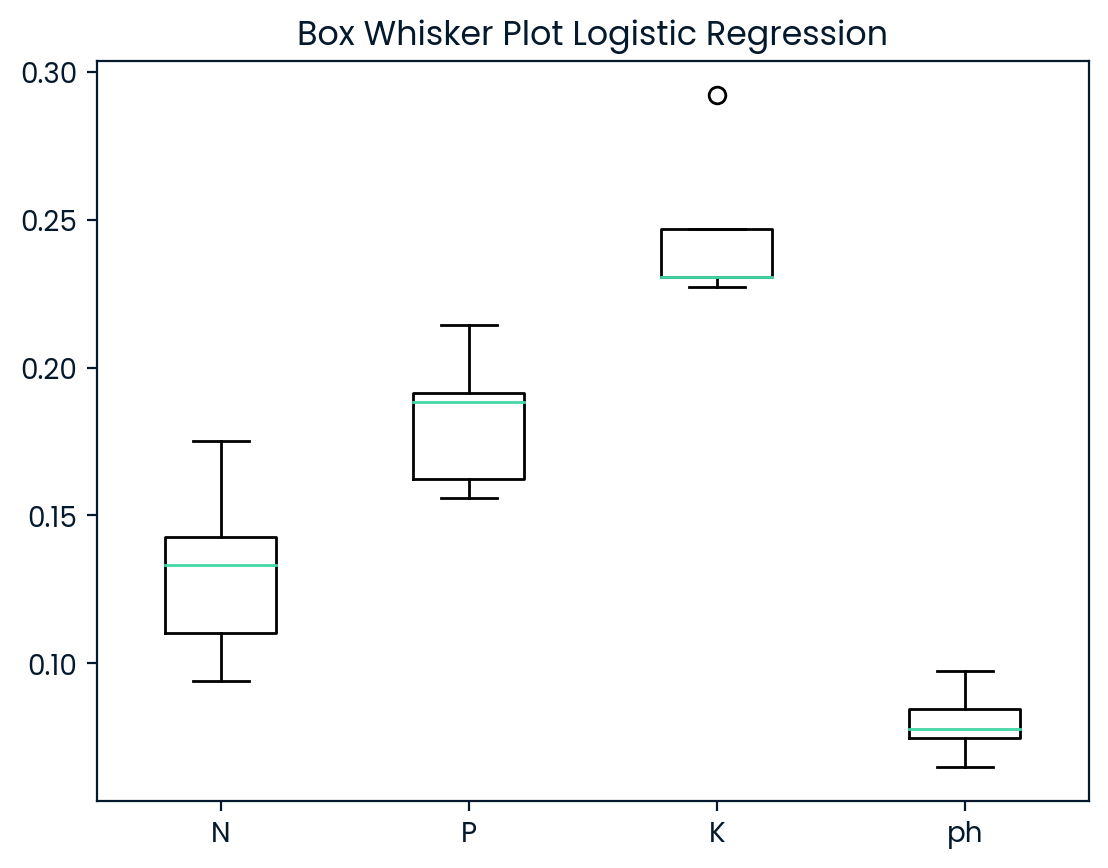

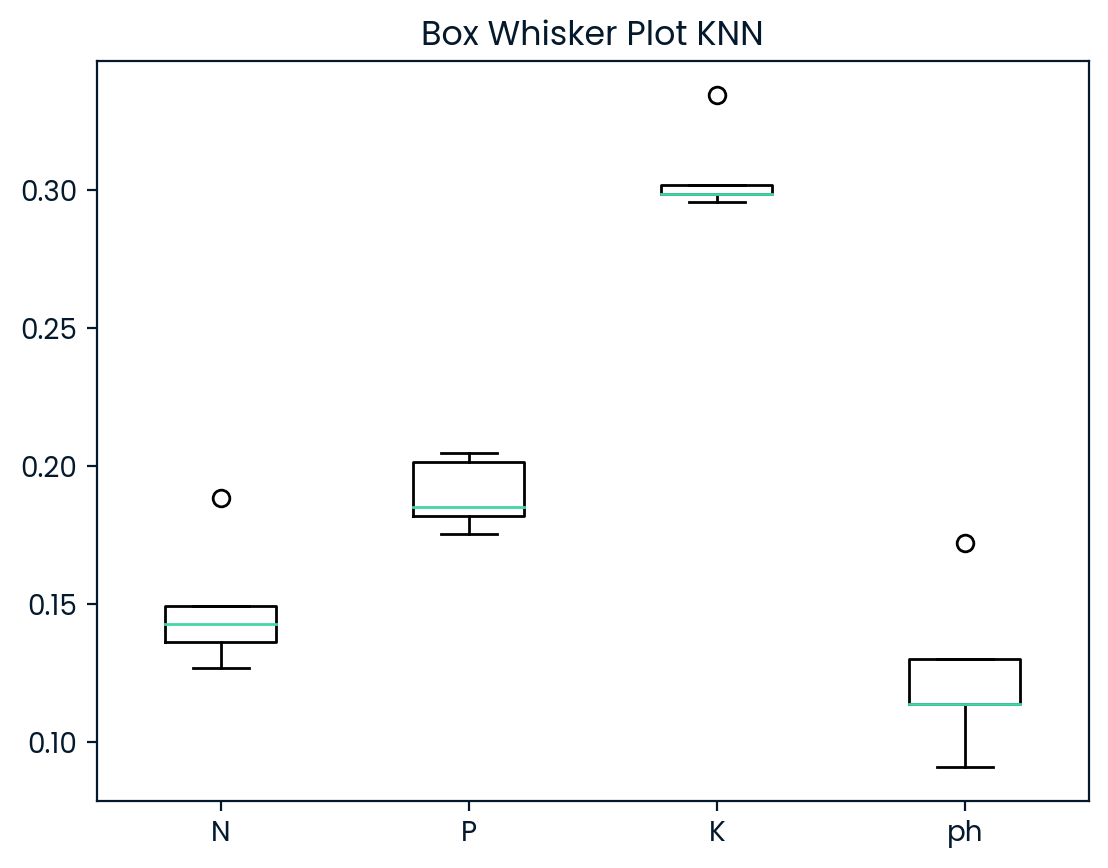

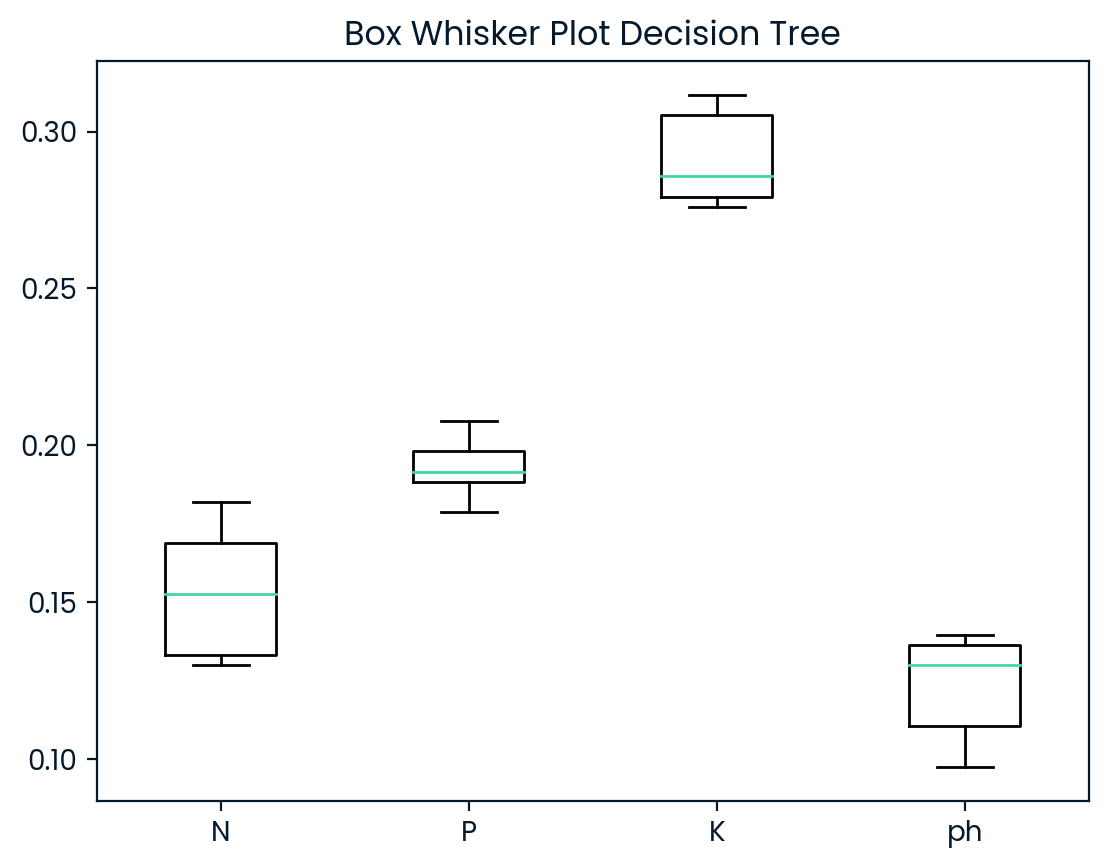

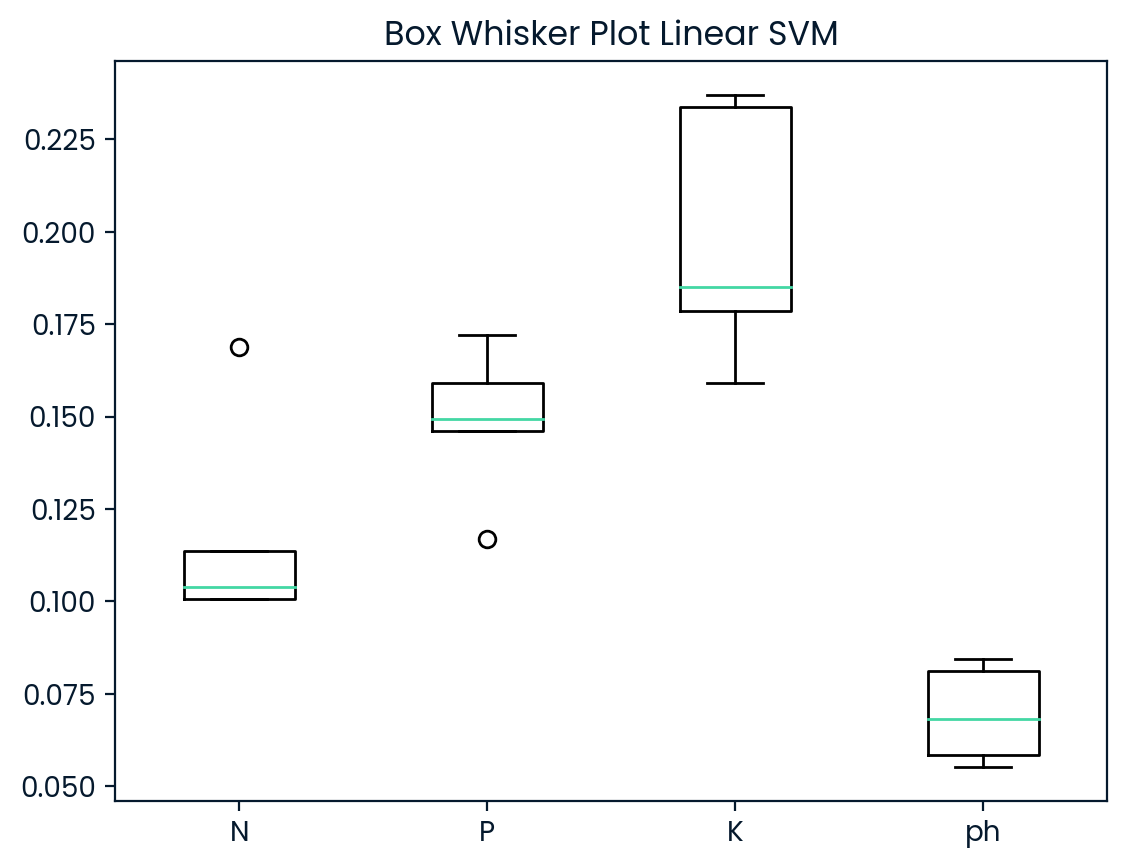

In [28]:
results = {}

for model_name, model in models.items():
    factors = []
    for i in range (X_train_scaled.shape[1]):
        # Picking a feature
        X_train_sub = X_train_scaled[:, i].reshape(-1, 1)
    
        # K-fold cross validation on model
        kf = KFold(n_splits=5, shuffle=True, random_state=12)
        cv = cross_val_score(model, X_train_sub, y_train, cv=kf)
        factors.append(cv)
    results[model_name] = factors
    plt.figure()
    plt.boxplot(results[model_name], labels=list(crops.columns[:4]))
    plt.title(f"Box Whisker Plot {model_name}")
    plt.show()

# Fine tuning n_neighbors

In [16]:
# Separting the single best feature for classification
X_train_best = X_train_scaled[:, 2].reshape(-1, 1)
X_test_best = X_test_scaled[:, 2].reshape(-1, 1)

# Preparing grid of values to search for
param_grid = {
              "n_neighbors": np.arange(3, 50),
              "weights": ["uniform", "distance"],
              "leaf_size": np.arange(10, 50, 2)
}

# Insatiating KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=12)

# Insantiating the model
knn = KNeighborsClassifier(n_jobs=-1)

# Insantiating Grid Search object
cv = GridSearchCV(knn, param_grid, cv=kf)

# Fitting training data 
cv.fit(X_train_best, y_train)

# Determing best parameter and performance on training set
print(cv.best_params_, cv.best_score_)

# Model Evaluation

In [19]:
knn = KNeighborsClassifier(n_neighbors=7, leaf_size=42, weights='uniform')
knn.fit(X_train_best, y_train)
score = knn.score(X_test_best, y_test)

In [20]:
best_predictive_feature = {"K": score}
print(best_predictive_feature)

{'K': 0.31666666666666665}
